### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import uniform
from scipy.stats import norm

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [176]:
data = pd.read_csv('/Users/jubacochran/environments/module_5/coupons.csv')

In [177]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


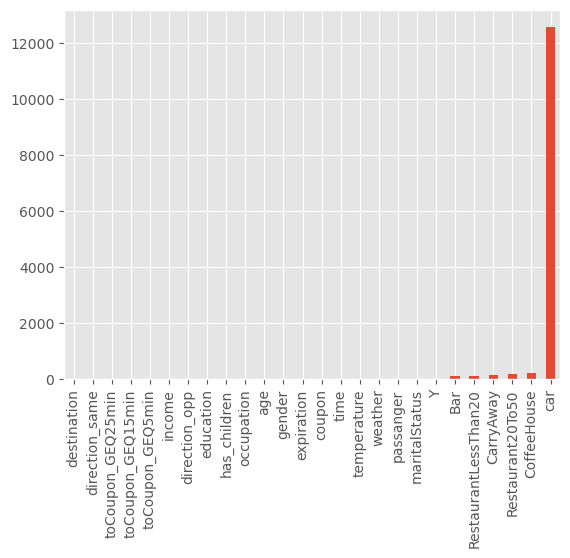

In [178]:
data.isnull().sum().sort_values().plot(kind='bar')
data.loc[data['car'].isnull()]

3. Decide what to do about your missing data -- drop, replace, other...

In [179]:


#Filling in the values that were missing with "unknown" This is so I can plot and analize data better. I didn't wan to drop nulls

data['CarryAway'].fillna('Unknown', inplace=True)
data['car'].fillna('Unknown', inplace=True)
data['Bar'].fillna('Unknown', inplace=True)
data['CoffeeHouse'].fillna('Unknown', inplace=True)
data['RestaurantLessThan20'].fillna('Unknown', inplace=True)
data['Restaurant20To50'].fillna('Unknown', inplace=True)


#adding ordinal categories for some of the user attributes. This will help with plots and stat analysis with the whole picture in mind
'''
category_mapping = {
    '0': 0,
    'less than 1': 1,
    '1 to 3': 2,
    '4 to 8': 3,
    'greater than 8': 4,
    'never': -1,
    'Unknown': -2
}

age_category_mapping = {
    'below 21': 0,
    '21 to 25': 1,
    '26 to 30': 2,
    '50plus': 3
}

# adding ordinal for age column
data['AgeOrdinal'] = data['age'].map(age_category_mapping)

# Handling missing values by assigning a -2 this is to keep the logic in line with all mappings
data['AgeOrdinal'].fillna(-2, inplace=True)


# Apply the mapping to Bar, Car, Coffee House,RestaurantLessThan20_Ordinal, Restaurant20To50_Ordinal and creating new columns. Row order will persist.

data['BarOrdinal'] = data['Bar'].map(category_mapping)
data['BarOrdinal'].fillna(-2, inplace=True)

data['CarryAwayOrdinal'] = data['CarryAway'].map(category_mapping)
data['CarryAwayOrdinal'].fillna(-2, inplace=True)

data['CoffeeHouseOrdinal'] = data['CoffeeHouse'].map(category_mapping)
data['CoffeeHouseOrdinal'].fillna(-2, inplace=True)

data['CarOrdinal'] = data['car'].map(category_mapping)
data['CarOrdinal'].fillna(-2, inplace=True)

data['RestaurantLessThan20_Ordinal'] = data['RestaurantLessThan20'].map(category_mapping)
data['RestaurantLessThan20_Ordinal'].fillna(-2, inplace=True)

data['Restaurant20To50_Ordinal'] = data['Restaurant20To50'].map(category_mapping)
data['Restaurant20To50_Ordinal'].fillna(-2, inplace=True)
'''

"\ncategory_mapping = {\n    '0': 0,\n    'less than 1': 1,\n    '1 to 3': 2,\n    '4 to 8': 3,\n    'greater than 8': 4,\n    'never': -1,\n    'Unknown': -2\n}\n\nage_category_mapping = {\n    'below 21': 0,\n    '21 to 25': 1,\n    '26 to 30': 2,\n    '50plus': 3\n}\n\n# adding ordinal for age column\ndata['AgeOrdinal'] = data['age'].map(age_category_mapping)\n\n# Handling missing values by assigning a -2 this is to keep the logic in line with all mappings\ndata['AgeOrdinal'].fillna(-2, inplace=True)\n\n\n# Apply the mapping to Bar, Car, Coffee House,RestaurantLessThan20_Ordinal, Restaurant20To50_Ordinal and creating new columns. Row order will persist.\n\ndata['BarOrdinal'] = data['Bar'].map(category_mapping)\ndata['BarOrdinal'].fillna(-2, inplace=True)\n\ndata['CarryAwayOrdinal'] = data['CarryAway'].map(category_mapping)\ndata['CarryAwayOrdinal'].fillna(-2, inplace=True)\n\ndata['CoffeeHouseOrdinal'] = data['CoffeeHouse'].map(category_mapping)\ndata['CoffeeHouseOrdinal'].fillna(-2

4. What proportion of the total observations chose to accept the coupon? 



In [180]:
yes_no_counts = data['Y'].value_counts()

# Calculate the percentage
yes_no_percentage = yes_no_counts / yes_no_counts.sum() * 100

print(yes_no_percentage)

Y
1    56.843267
0    43.156733
Name: count, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

Y                              0          1
coupon                                     
Bar                    58.998513  41.001487
Carry out & Take away  26.452152  73.547848
Coffee House           50.075075  49.924925
Restaurant(20-50)      55.898123  44.101877
Restaurant(<20)        29.289304  70.710696


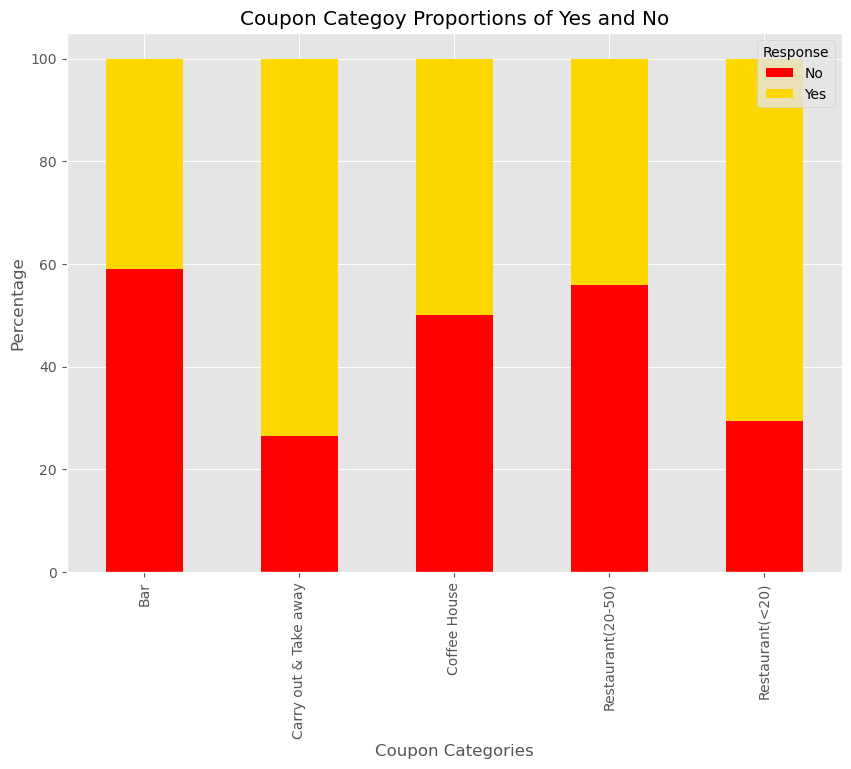

In [181]:
#using groupby method to create sub's of coupon and to returen proportions in percentages

catagoryies_of_coupons = data.groupby('coupon')['Y'].value_counts(normalize=True).unstack() * 100
print(catagoryies_of_coupons)

#Using a style for polish
plt.style.use('ggplot')
catagoryies_of_coupons.plot(kind='bar', stacked=True, color=['Red', 'Gold'], figsize=(10, 7))

plt.title('Coupon Categoy Proportions of Yes and No')
plt.xlabel('Coupon Categories')
plt.ylabel('Percentage')
plt.legend(title='Response', labels=['No', 'Yes'])

plt.show()

6. Use a histogram to visualize the temperature column.

temperature
False    12684
Name: count, dtype: int64
count    12684.000000
mean        63.301798
std         19.154486
min         30.000000
25%         55.000000
50%         80.000000
75%         80.000000
max         80.000000
Name: temperature, dtype: float64


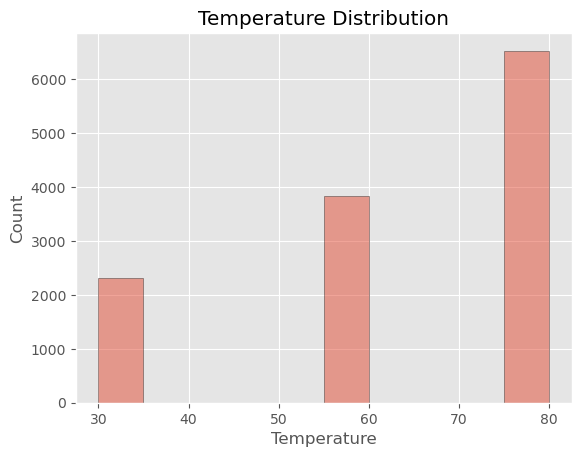

In [182]:
#This plot shows a skewed ditribution. I tried some transformation to make this distribution normal but they all showed similar distribtions
plt.hist(data['temperature'], edgecolor='black', alpha=0.5)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.grid(True)
#plt.show()

#Furthermore I'm not missing any data in the temperature column
print(data['temperature'].isnull().value_counts())
print(data['temperature'].describe())

In [183]:
#This data has holes in it that I'll need to fill with theoretiacal PDF. I tried a few transormations but it didn't work

#Creating a PD for temp
temp= uniform(loc=30, scale = 50)
#a, b = data['temperature'].min(), data['temperature'].max()
#print(a,b)

Mean: 55.0, Variance: 208.33333333333331


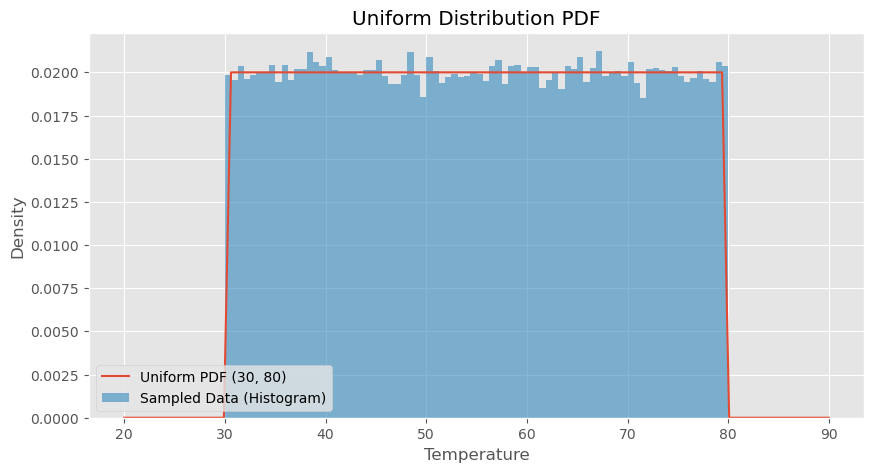

In [184]:
#Using this method from class to create spaced values and to compare plots
x = np.linspace(20,90,100)
y = temp.pdf(x)

temp_mean = temp.mean()
temp_variance = temp.var()
print(f"Mean: {temp_mean}, Variance: {temp_variance}")

plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Uniform PDF (30, 80)')
plt.title('Uniform Distribution PDF')
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

# Sample from the distribution and plot the histogram
samples = temp.rvs(size=100000)  # Law of large numbers at play
plt.hist(samples, bins=80, alpha=0.6, label='Sampled Data (Histogram)', density=True)
plt.legend()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [185]:
#Creating new DataFrame focusing on Bar coupon and resetting index
bar_coupons = data[data['coupon']=='Bar'].reset_index()
print(bar_coupons)
print(type(bar_coupons))

      index      destination  passanger weather  temperature  time coupon  \
0         9  No Urgent Place     Kid(s)   Sunny           80  10AM    Bar   
1        13             Home      Alone   Sunny           55   6PM    Bar   
2        17             Work      Alone   Sunny           55   7AM    Bar   
3        24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar   
4        35             Home      Alone   Sunny           55   6PM    Bar   
...     ...              ...        ...     ...          ...   ...    ...   
2012  12663  No Urgent Place  Friend(s)   Sunny           80  10PM    Bar   
2013  12664  No Urgent Place  Friend(s)   Sunny           55  10PM    Bar   
2014  12667  No Urgent Place      Alone   Rainy           55  10AM    Bar   
2015  12670  No Urgent Place    Partner   Rainy           55   6PM    Bar   
2016  12682             Work      Alone   Snowy           30   7AM    Bar   

     expiration  gender age  ... CoffeeHouse  CarryAway RestaurantLessThan2

2. What proportion of bar coupons were accepted?


In [186]:

bar_yes_no_counts = bar_coupons['Y'].value_counts()

# Calculate the percentage
bar_yes_no_percentage = bar_yes_no_counts / bar_yes_no_counts.sum() * 100

print(bar_yes_no_percentage)

Y
0    58.998513
1    41.001487
Name: count, dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [187]:


#Creating conditional statement query for frequency of 3 or fewer times
went_to_bar_3_or_less = bar_coupons.query("Bar == '1~3' or Bar == 'less1' ")

#Creating conditional statement query for frequency of 4 or more times
went_to_bar_4_or_more = bar_coupons.query("Bar == '4~8' or Bar == 'gt8' ")

# Calculate the acceptance rate for those who went to a bar 3 or fewer times
yes_count_3_or_less = went_to_bar_3_or_less['Y'].sum()
total_responses_3_or_less = went_to_bar_3_or_less['Y'].count()
#Calculating acceptance rate
acceptance_rate_3_or_less = yes_count_3_or_less / total_responses_3_or_less

# Calculate the acceptance rate for those who went to a bar 4 or more times
yes_count_4_or_more = went_to_bar_4_or_more['Y'].sum()
total_responses_4_or_more = went_to_bar_4_or_more['Y'].count()
#Calculating acceptance rate
acceptance_rate_4_or_more = yes_count_4_or_more / total_responses_4_or_more

# Print the results for comparison
print(f"Acceptance Rate for 3 or fewer times to the Bar: {acceptance_rate_3_or_less:.2f}")
print(f"Acceptance Rate for 4 or more times to the Bar: {acceptance_rate_4_or_more:.2f}")

Acceptance Rate for 3 or fewer times to the Bar: 0.53
Acceptance Rate for 4 or more times to the Bar: 0.77


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [201]:
#Filtering Bar Coupons and assigning to new DF(just playing with different ways of doing this)
drivers_bar =data[data['coupon'] == 'Bar']

#Filtering for drivers over the age of 25 who accepted the coupon that visit the bar more than once a month. 
age_bar_over25_years_old = drivers_bar.query("age in ['26', '31', '50plus', '41', '36', '46'] and Bar in ['1~3', '4~8', 'gt8']")
accepted_over_25 = age_bar_over25_years_old.query("Y == 1")

num_accepted_age = accepted_over_25.shape[0]
print(num_accepted_age)

'''
Attemping to filter for all other drivers(I'm not 100% sure if it should include or exclue every value in the Bar vector. The question implies "all others")
I'm not sure if it's reasonable to teat null values as I've defined 'never'. It heavliy skews my data. If I include 'never' my values are as calculated below:
Acceptance Rate for drivers over 25 who go to the bar frequently and accepted the coupon: 0.12
Acceptance Rate for all other bar visitors: 0.17
'''

all_others = drivers_bar.query("not (age in ['26', '31', '50plus', '41', '36', '46'] and Bar in ['less1','1~3', '4~8', 'gt8'])")
all_other_accepted = all_others.query("Y == 1 ").shape[0]
#print(all_others)

#Defining the denom for rate calc
total_responses = drivers_bar.shape[0]

# Calculating the acceptance rates acceptance = number of yes according to age and frequencey/total responses across all others
#total_yes_over25 = age_bar_over25_years_old['Y'].sum()
total_responses_over25 = num_accepted_age
acceptance_rate_over25 = total_responses_over25 / total_responses 

#total_yes_others = all_others['Y'].sum()
total_responses_others = all_other_accepted
acceptance_rate_others = all_other_accepted / total_responses



# Print the results I didn't format the the int to, two decimal places because I wanted to see the raw value since I'm confused about 'never' situation in Bar
print(f"Acceptance Rate for drivers over 25 who go to the bar frequently and accepted the coupon: {acceptance_rate_over25}")
print(f"Acceptance Rate for all other bar visitors: {acceptance_rate_others}")

292
Acceptance Rate for drivers over 25 who go to the bar frequently and accepted the coupon: 0.14476945959345563
Acceptance Rate for all other bar visitors: 0.1745166088249876


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [203]:
#Filtering Bar Coupons and assigning to new DF(just playing with different ways of doing this)


# Assuming 'data' is your DataFrame loaded with relevant data

# Step 1: Filter the DataFrame based on multiple criteria
drivers_with_passengers_and_occupations_bar = data.query(
    "coupon == 'Bar' and passanger != 'Kid(s)' and ~occupation.isin(['farming', 'fishing', 'forestry'])"
).reset_index()

# Step 2: Calculate the number of 'Yes' responses within the filtered group
accepted_drivers_with_passengers = drivers_with_passengers_and_occupations_bar.query("Y == 1")

num_accepted = accepted_drivers_with_passengers.shape[0]

# Step 3: Calculate the total number of responses in the filtered group
total_responses = drivers_bar.shape[0]  # Total opportunities for acceptance

# Step 4: Calculate the acceptance rate
acceptance_rate = num_accepted / total_responses

# Printing the results
print("Number of acceptances:", num_accepted)
print("Total responses:", total_responses)
print("Acceptance Rate:", acceptance_rate)

# Step 5: If overlap concerns exist, adjust the count by identifying unique users
# Assuming there's an 'id' column that uniquely identifies respondents
#unique_accepted = accepted_drivers_with_passengers['id'].nunique()
#unique_total = drivers_with_passengers_and_occupations_bar['id'].nunique()

# Adjusted acceptance rate to handle overlaps
#adjusted_acceptance_rate = unique_accepted / unique_total if unique_total > 0 else 0

#print("Adjusted Acceptance Rate:", adjusted_acceptance_rate)

Number of acceptances: 784
Total responses: 2017
Acceptance Rate: 0.3886960832920178


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  